<a href="https://colab.research.google.com/github/soumyajitkundu05/Face-masking-detection/blob/main/face_masking_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:01<00:00, 157MB/s]
100% 163M/163M [00:01<00:00, 142MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


importing the dependencies


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2181.jpg', 'with_mask_1942.jpg', 'with_mask_581.jpg', 'with_mask_1026.jpg', 'with_mask_1614.jpg']
['with_mask_2381.jpg', 'with_mask_140.jpg', 'with_mask_2643.jpg', 'with_mask_2797.jpg', 'with_mask_1421.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3324.jpg', 'without_mask_1680.jpg', 'without_mask_522.jpg', 'without_mask_893.jpg', 'without_mask_2221.jpg']
['without_mask_2420.jpg', 'without_mask_3075.jpg', 'without_mask_2735.jpg', 'without_mask_3749.jpg', 'without_mask_1667.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


creating labels for the two class of images

with mask = 1

without mask = 0

In [ ]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

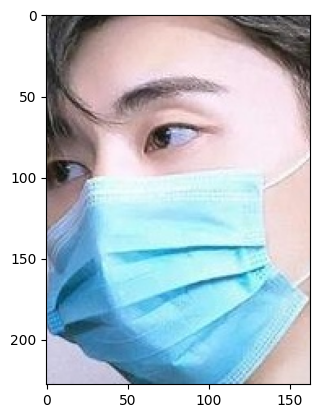

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

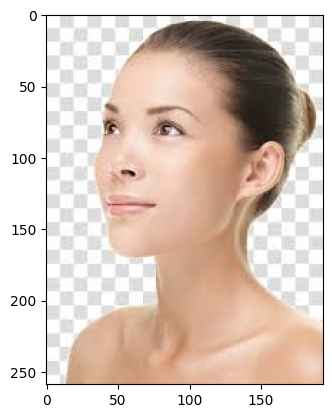

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

image processing

Resize the images

Convert the images to numpy images

In [ ]:
#convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[249, 238, 242],
        [253, 230, 218],
        [223, 180, 144],
        ...,
        [250, 250, 252],
        [249, 249, 251],
        [251, 251, 253]],

       [[235, 235, 237],
        [242, 221, 210],
        [231, 184, 153],
        ...,
        [249, 249, 251],
        [249, 249, 251],
        [247, 247, 249]],

       [[232, 225, 237],
        [239, 219, 206],
        [237, 198, 163],
        ...,
        [250, 250, 251],
        [250, 250, 251],
        [248, 248, 250]]], dtype=uint8)
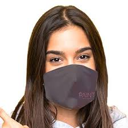

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[171, 189, 189],
        [171, 189, 189],
        [171, 189, 189],
        ...,
        [171, 189, 189],
        [171, 189, 189],
        [171, 189, 189]],

       [[171, 189, 189],
        [171, 189, 189],
        [171, 189, 189],
        ...,
        [171, 189, 189],
        [171, 189, 189],
        [171, 189, 189]],

       [[171, 189, 189],
        [171, 189, 189],
        [171, 189, 189],
        ...,
        [171, 189, 189],
        [171, 189, 189],
        [171, 189, 189]],

       ...,

       [[ 75, 109, 165],
        [ 61,  94, 153],
        [ 60,  91, 154],
        ...,
        [160, 178, 179],
        [160, 178, 179],
        [159, 178, 177]],

       [[ 61,  92, 149],
        [ 62,  91, 151],
        [ 60,  89, 150],
        ...,
        [158, 177, 176],
        [160, 176, 172],
        [158, 177, 173]],

       [[ 61,  90, 148],
        [ 62,  91, 151],
        [ 60,  89, 149],
        ...,
        [157, 177, 174],
        [160, 177, 170],
        [159, 177, 173]]], dtype=uint8)
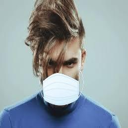

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        ...,
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647]],

       [[0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        ...,
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647]],

       [[0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        ...,
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647]],

       ...,

       [[0.29411765, 0.42745098, 0.64705882],
        [0.23921569, 0.36862745, 0.6       ],
        [0.23529412, 0

Building a CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile the neural network

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - acc: 0.7132 - loss: 0.5638 - val_acc: 0.8678 - val_loss: 0.2968
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.8847 - loss: 0.2839 - val_acc: 0.8893 - val_loss: 0.2447
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9136 - loss: 0.2297 - val_acc: 0.9107 - val_loss: 0.2208
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9220 - loss: 0.2083 - val_acc: 0.9025 - val_loss: 0.2111
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9472 - loss: 0.1446 - val_acc: 0.8992 - val_loss: 0.2469


Model evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9165 - loss: 0.2217
Test Accuracy = 0.911316990852356


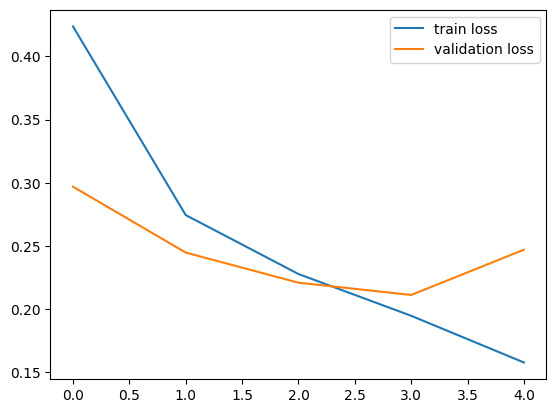

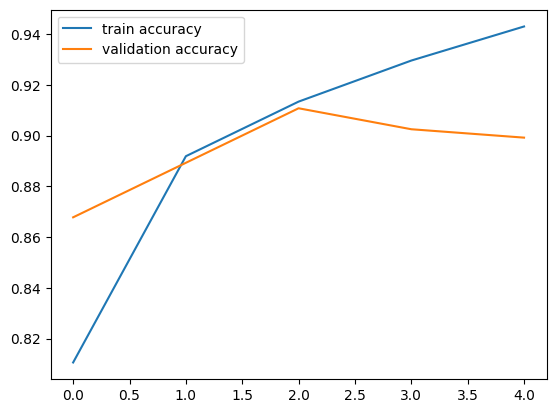

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

prdictive system

Path of the image to be predicted: /content/temp1.webp


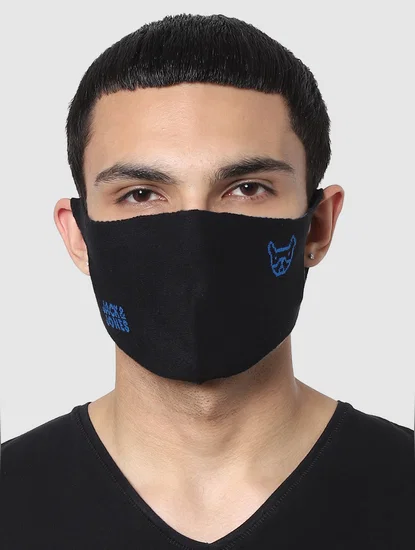

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.5171893  0.56384224]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image NOT is wearing a mask')